<a href="https://colab.research.google.com/github/gratusrichard/Celeb_face_recognition/blob/main/YuNet_vs_RetinaFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar_int8.onnx

--2024-01-02 11:36:56--  https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar_int8.onnx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/opencv/opencv_zoo/main/models/face_detection_yunet/face_detection_yunet_2023mar_int8.onnx [following]
--2024-01-02 11:36:57--  https://media.githubusercontent.com/media/opencv/opencv_zoo/main/models/face_detection_yunet/face_detection_yunet_2023mar_int8.onnx
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100416 (98K) [application/octet-stream]
Saving to: ‘face_detection_yunet_2023mar_int8.onnx’



In [2]:
!wget https://i.ndtvimg.com/mt/2014-11/gigantic-selfie-650_1.jpg

--2024-01-02 11:36:58--  https://i.ndtvimg.com/mt/2014-11/gigantic-selfie-650_1.jpg
Resolving i.ndtvimg.com (i.ndtvimg.com)... 72.247.97.111, 2600:1406:5e00:1a0::24e8, 2600:1406:5e00:18f::24e8
Connecting to i.ndtvimg.com (i.ndtvimg.com)|72.247.97.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77175 (75K) [image/jpeg]
Saving to: ‘gigantic-selfie-650_1.jpg’

gigantic-selfie-650 100%[===================>]  75.37K  --.-KB/s    in 0.01s   

2024-01-02 11:36:58 (5.35 MB/s) - ‘gigantic-selfie-650_1.jpg’ saved [77175/77175]



In [26]:
# !wget https://mymodernmet.com/wp/wp-content/uploads/2020/10/facial-recognition-test.jpg

--2024-01-02 11:33:49--  https://mymodernmet.com/wp/wp-content/uploads/2020/10/facial-recognition-test.jpg
Resolving mymodernmet.com (mymodernmet.com)... 104.26.1.124, 104.26.0.124, 172.67.71.100, ...
Connecting to mymodernmet.com (mymodernmet.com)|104.26.1.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176031 (172K) [image/jpeg]
Saving to: ‘facial-recognition-test.jpg.1’

facial-recognition- 100%[===================>] 171.91K  --.-KB/s    in 0.02s   

2024-01-02 11:33:49 (8.64 MB/s) - ‘facial-recognition-test.jpg.1’ saved [176031/176031]



In [3]:
!wget https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg

--2024-01-02 11:37:09--  https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg
Resolving dynaimage.cdn.cnn.com (dynaimage.cdn.cnn.com)... 104.91.214.54, 2600:1406:5e00:19b::3134
Connecting to dynaimage.cdn.cnn.com (dynaimage.cdn.cnn.com)|104.91.214.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238660 (233K) [image/jpeg]
Saving to: ‘https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg’

https:%2F%2Fcdn.cnn 100%[===================>] 233.07K  --.-KB/s    in 0.06s   

2024-01-02 11:37:09 (3.91 MB/s) - ‘https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg’ saved [238660/238660]



In [4]:
!pip install opencv-python


In [5]:
import cv2 as cv2

In [6]:
import time

In [29]:
img = cv2.imread(filename=r'/content/https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg')
print(img.shape[0:2])


(675, 1200)


In [8]:
imagepath1 = "/content/gigantic-selfie-650_1.jpg"

# Yunet implementation

In [30]:
detector = cv2.FaceDetectorYN.create("/content/face_detection_yunet_2023mar_int8.onnx", "", (320, 320),score_threshold = 0.8)
# img = cv2.imread("/content/gigantic-selfie-650_1.jpg")
img_W = int(img.shape[1])
img_H = int(img.shape[0])
detector.setInputSize((img_W, img_H))
start_time = time.time()
detections = detector.detect(img)[1]
end_time = time.time()
elapsed_time_ms = ( end_time - start_time ) * 1000
print(f"Processing time: {elapsed_time_ms:.2f} milliseconds")


Processing time: 216.79 milliseconds


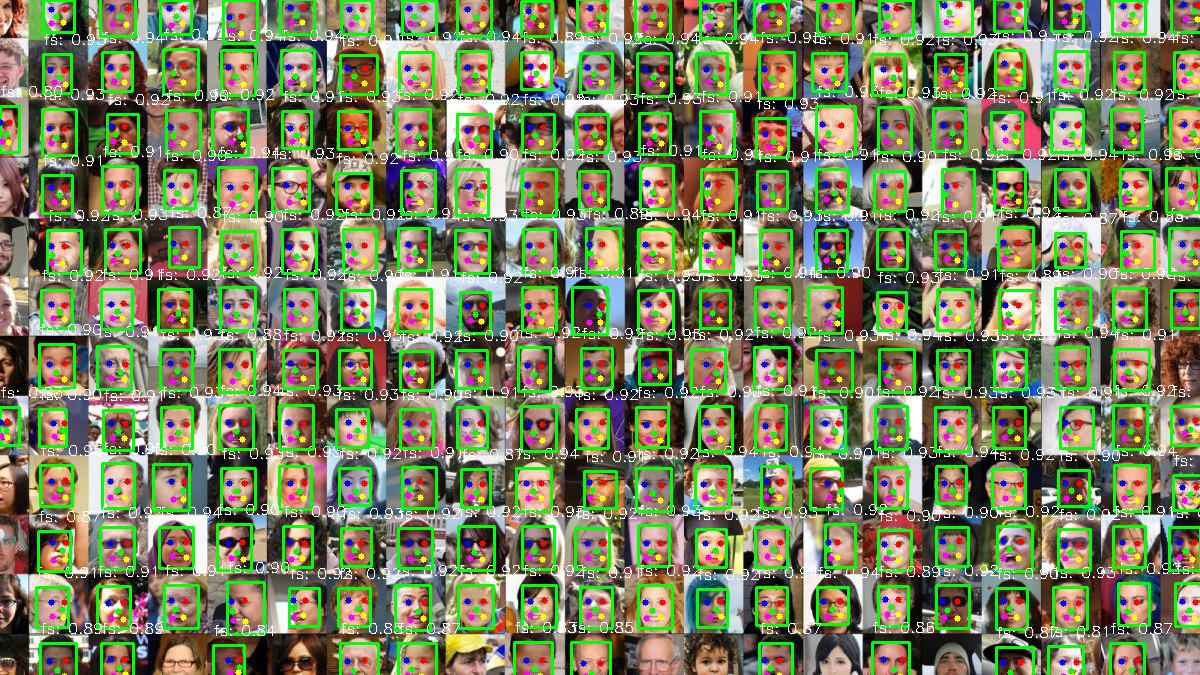

In [10]:
from google.colab.patches import cv2_imshow
import numpy as np

def visualize_face_detections(image_path, detections):
    image = cv2.imread(image_path)

    for detection in detections:
        x, y, width, height = map(int, detection[:4])
        right_eye = tuple(map(int, detection[4:6]))
        left_eye = tuple(map(int, detection[6:8]))
        nose_tip = tuple(map(int, detection[8:10]))
        right_mouth_corner = tuple(map(int, detection[10:12]))
        left_mouth_corner = tuple(map(int, detection[12:14]))
        face_score = detection[14]

        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

        cv2.circle(image, right_eye, 3, (255, 0, 0), -1)
        cv2.circle(image, left_eye, 3, (0, 0, 255), -1)
        cv2.circle(image, nose_tip, 3, (0, 255, 0), -1)
        cv2.circle(image, right_mouth_corner, 3, (255, 0, 255), -1)
        cv2.circle(image, left_mouth_corner, 3, (0, 255, 255), -1)

        cv2.putText(image, f"fs: {face_score:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    cv2_imshow(image)

image_path = r"/content/https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg"
visualize_face_detections(image_path, detections)


In [11]:
!pip install retina-face


In [12]:
from retinaface import RetinaFace


In [35]:
start_time = time.time()

face_data = RetinaFace.detect_faces(r"/content/https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg")

end_time = time.time()
elapsed_time_ms = ( end_time - start_time ) * 1000
print(f"processing time: {elapsed_time_ms:.2f} milliseconds")

processing time: 1337.56 milliseconds


# RetinaFace

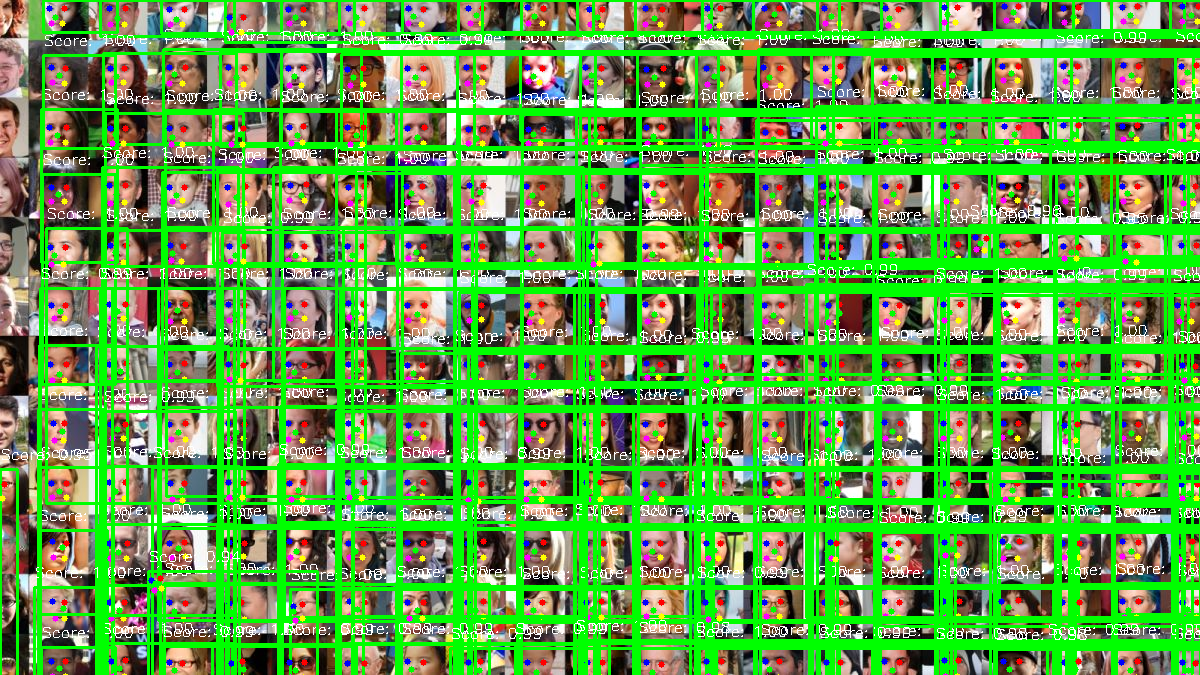

In [14]:
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def visualize_face_detection(image_path, face_data):
    image = cv2.imread(image_path)

    for face_name, face_info in face_data.items():
        score = face_info["score"]
        facial_area = face_info["facial_area"]
        landmarks = face_info["landmarks"]

        x, y, width, height = facial_area
        right_eye = tuple(map(int, landmarks["right_eye"]))
        left_eye = tuple(map(int, landmarks["left_eye"]))
        nose_tip = tuple(map(int, landmarks["nose"]))
        right_mouth_corner = tuple(map(int, landmarks["mouth_right"]))
        left_mouth_corner = tuple(map(int, landmarks["mouth_left"]))

        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

        cv2.circle(image, right_eye, 3, (255, 0, 0), -1)
        cv2.circle(image, left_eye, 3, (0, 0, 255), -1)
        cv2.circle(image, nose_tip, 3, (0, 255, 0), -1)
        cv2.circle(image, right_mouth_corner, 3, (255, 0, 255), -1)
        cv2.circle(image, left_mouth_corner, 3, (0, 255, 255), -1)

        cv2.putText(image, f"Score: {score:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    cv2_imshow(image)

image_path = r"/content/https:%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190418095933-20190418-facial-recognition-dataset-2-gfx.jpg"

visualize_face_detection(image_path, face_data)



# Yunet impmlementation 2

In [15]:
img = cv2.imread(imagepath1)

In [24]:
detector = cv2.FaceDetectorYN.create("/content/face_detection_yunet_2023mar_int8.onnx", "", (320, 320),score_threshold = 0.6)

img_W = int(img.shape[1])
img_H = int(img.shape[0])
detector.setInputSize((img_W, img_H))
start_time = time.time()
detections = detector.detect(img)[1]
end_time = time.time()
elapsed_time_ms = ( end_time - start_time ) * 1000
print(f"processed time: {elapsed_time_ms:.2f} milliseconds")


processed time: 46.22 milliseconds


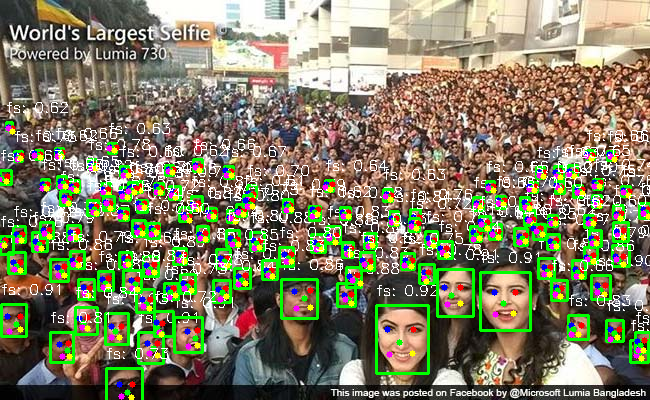

In [25]:
from google.colab.patches import cv2_imshow
import numpy as np

def visualize_face_detections(image_path, detections):
    image = cv2.imread(image_path)

    for detection in detections:
        x, y, width, height = map(int, detection[:4])
        right_eye = tuple(map(int, detection[4:6]))
        left_eye = tuple(map(int, detection[6:8]))
        nose_tip = tuple(map(int, detection[8:10]))
        right_mouth_corner = tuple(map(int, detection[10:12]))
        left_mouth_corner = tuple(map(int, detection[12:14]))
        face_score = detection[14]

        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

        cv2.circle(image, right_eye, 3, (255, 0, 0), -1)
        cv2.circle(image, left_eye, 3, (0, 0, 255), -1)
        cv2.circle(image, nose_tip, 3, (0, 255, 0), -1)
        cv2.circle(image, right_mouth_corner, 3, (255, 0, 255), -1)
        cv2.circle(image, left_mouth_corner, 3, (0, 255, 255), -1)

        cv2.putText(image, f"fs: {face_score:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    cv2_imshow(image)

image_path = imagepath1
visualize_face_detections(image_path, detections)


# Retinaface implementation 2

In [33]:
start_time = time.time()

face_data = RetinaFace.detect_faces(imagepath1)

end_time = time.time()
elapsed_time_ms = ( end_time - start_time ) * 1000
print(f"Processed Time: {elapsed_time_ms:.2f} milliseconds")

Processed Time: 695.87 milliseconds


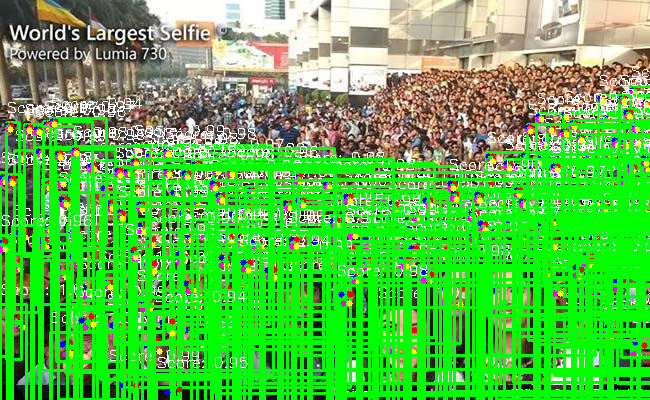

In [32]:
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def visualize_face_detection(image_path, face_data):
    image = cv2.imread(image_path)

    for face_name, face_info in face_data.items():
        score = face_info["score"]
        facial_area = face_info["facial_area"]
        landmarks = face_info["landmarks"]

        x, y, width, height = facial_area
        right_eye = tuple(map(int, landmarks["right_eye"]))
        left_eye = tuple(map(int, landmarks["left_eye"]))
        nose_tip = tuple(map(int, landmarks["nose"]))
        right_mouth_corner = tuple(map(int, landmarks["mouth_right"]))
        left_mouth_corner = tuple(map(int, landmarks["mouth_left"]))

        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

        cv2.circle(image, right_eye, 3, (255, 0, 0), -1)
        cv2.circle(image, left_eye, 3, (0, 0, 255), -1)
        cv2.circle(image, nose_tip, 3, (0, 255, 0), -1)
        cv2.circle(image, right_mouth_corner, 3, (255, 0, 255), -1)
        cv2.circle(image, left_mouth_corner, 3, (0, 255, 255), -1)

        cv2.putText(image, f"Score: {score:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)


    cv2_imshow(image)

image_path = imagepath1

visualize_face_detection(image_path, face_data)

